In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
import os
import PIL
import matplotlib.pyplot as plt
from tensorflow.keras import layers


In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 1s 0us/step


In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


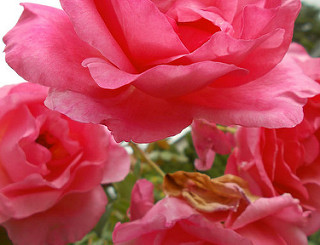

In [5]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

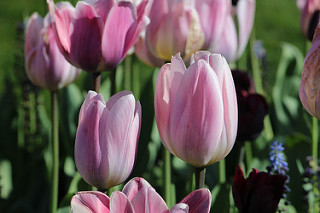

In [6]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size


)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


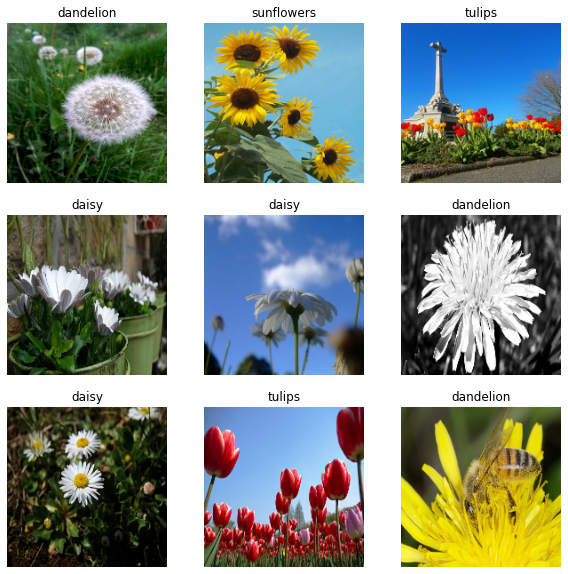

In [23]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')


In [12]:
for image_batch, label_batch in train_ds:
  print(image_batch.shape)
  print(label_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [13]:
normalization_layers = layers.Rescaling(scale=1./255)

In [14]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16,3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3 ,padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64 ,3 ,padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)



])

In [15]:
model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [17]:
epochs=10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
92/92 [==============================] - 114s 1s/step - loss: 1.3196 - accuracy: 0.4370 - val_loss: 1.0396 - val_accuracy: 0.5790
Epoch 2/10
92/92 [==============================] - 118s 1s/step - loss: 0.9885 - accuracy: 0.6253 - val_loss: 0.9456 - val_accuracy: 0.6063
Epoch 3/10
92/92 [==============================] - 117s 1s/step - loss: 0.7729 - accuracy: 0.7125 - val_loss: 0.9914 - val_accuracy: 0.6308
Epoch 4/10
92/92 [==============================] - 105s 1s/step - loss: 0.5743 - accuracy: 0.7939 - val_loss: 0.9950 - val_accuracy: 0.6485
Epoch 5/10
92/92 [==============================] - 97s 1s/step - loss: 0.3539 - accuracy: 0.8791 - val_loss: 1.3435 - val_accuracy: 0.6172
Epoch 6/10
92/92 [==============================] - 97s 1s/step - loss: 0.2297 - accuracy: 0.9278 - val_loss: 1.2684 - val_accuracy: 0.6703
Epoch 7/10
92/92 [==============================] - 97s 1s/step - loss: 0.1315 - accuracy: 0.9591 - val_loss: 1.3735 - val_accuracy: 0.6580
Epoch 8/10
92/92

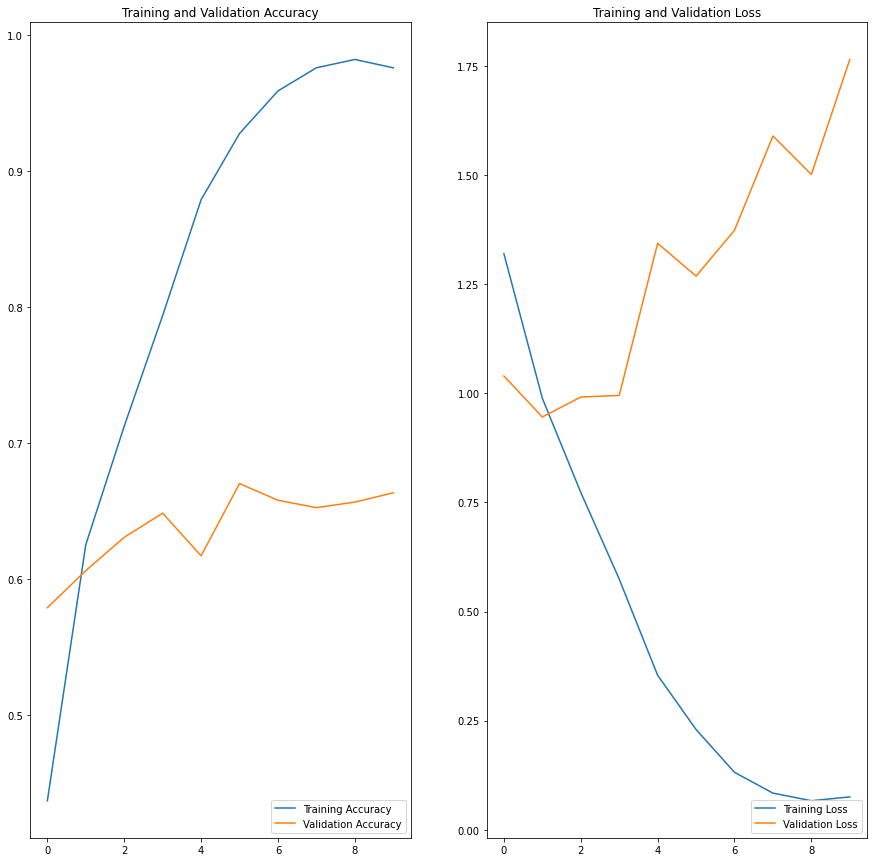

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.show()







In [25]:
data_augmentation = keras.Sequential(
    [
     layers.RandomFlip('horizontal', input_shape = (img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

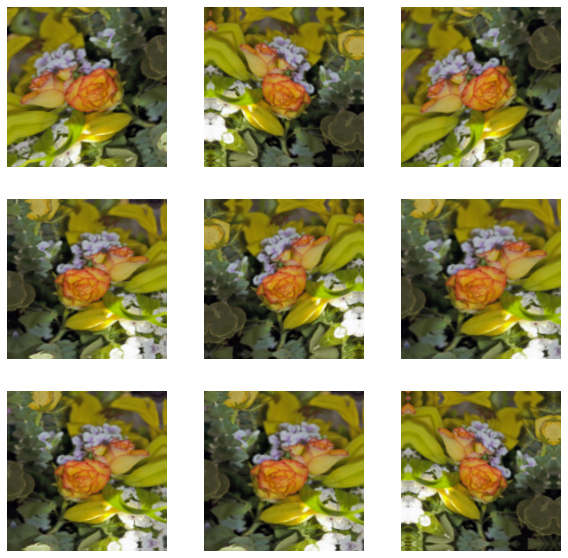

In [31]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')


In [32]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3 ,padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64 ,3 ,padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [34]:
model.compile(optimizer='Adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [36]:
epochs=15
history = model.fit(train_ds, 
                    validation_data = val_ds,
                    epochs= epochs
                  
                    )

Epoch 1/15
92/92 [==============================] - 116s 1s/step - loss: 1.2157 - accuracy: 0.4864 - val_loss: 1.0828 - val_accuracy: 0.5545
Epoch 2/15
92/92 [==============================] - 152s 2s/step - loss: 0.9829 - accuracy: 0.6161 - val_loss: 0.9164 - val_accuracy: 0.6390
Epoch 3/15
92/92 [==============================] - 124s 1s/step - loss: 0.8912 - accuracy: 0.6482 - val_loss: 0.9289 - val_accuracy: 0.6608
Epoch 4/15
92/92 [==============================] - 152s 2s/step - loss: 0.8394 - accuracy: 0.6747 - val_loss: 0.8098 - val_accuracy: 0.6826
Epoch 5/15
92/92 [==============================] - 155s 2s/step - loss: 0.7918 - accuracy: 0.6921 - val_loss: 0.8430 - val_accuracy: 0.6839
Epoch 6/15
92/92 [==============================] - 112s 1s/step - loss: 0.7604 - accuracy: 0.7136 - val_loss: 0.8238 - val_accuracy: 0.6880
Epoch 7/15
92/92 [==============================] - 114s 1s/step - loss: 0.7325 - accuracy: 0.7217 - val_loss: 0.7205 - val_accuracy: 0.7234
Epoch 8/15
92

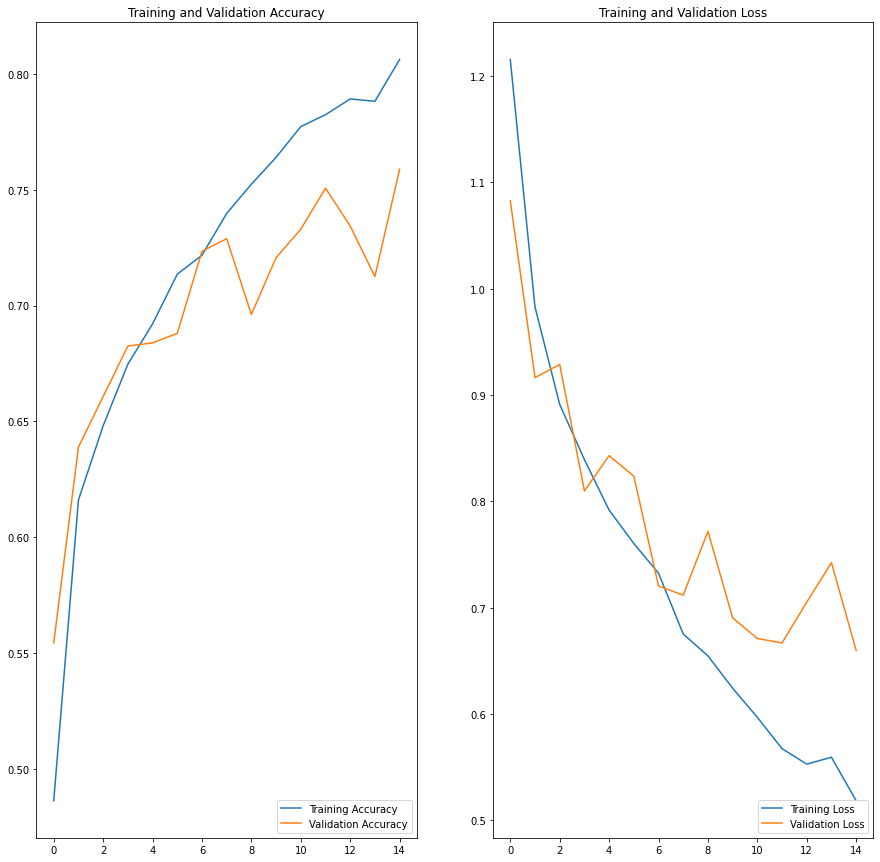

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.show()

In [38]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin = sunflower_url)

img = tf.keras.utils.load_img(sunflower_path, target_size=(img_height, img_width))
img_array= tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100*np.max(score)))




131072/117948 [=================================] - 0s 0us/step
This image most likely belongs to sunflowers with a 99.95 percent confidence.
